# Churn prediction

The Chief Retail Officer of the bank noticed a steady increase in the number of inactive users over the years which made her realize that the use of a data-driven solution is necessary to overcome the limitations of the current rule-based approach for monitoring user activity. Considering the nature of the data, you proposed to build a classification model that could accurately predict which customers are likely to turn inactive in the next 3 months.

##Data Description:
- **CustomerID**: unique customer identification number
- **Geography**: customers’ registration region Gender: Male/Female
- **Age_Band**: the range of ages the customer belongs to
- **TenureYears**: tenure since the first bank account opening
- **EstimatedIncome**: estimated yearly incomeBalanceEuros: total financial assets (savings/deposits)
- **NoProducts**: number of total products the customer holds
- **CreditCardholder**: credit card ownership
- **CustomerWithLoan**: indicator of whether the customer has taken a loan (consumer/mortgage)
- **Digital_TRX_ratio**: digital over physical transactions ratio
- **Inactive** (target): last 3 months customer’s activity (binary)

## Theoretical Approach

### Data Preparation
The data preparation stage consists of three stages. The `initial data exploration` where the data is being explored to find abnormalities. The `understanding` of the data, were mainly the correlation between the features is being discovered. Finally, the `preparation for modelling` where data is splitted into train, validation and test sets, for the specific needs of the task.

Initial Data Exploration
- Missing values
- Outlier detection
- Duplicate values
- Correlation between features

Prepare data for model
- Handling categorical variables (if needed)
- Normalisation (if needed)
- Dimensionality reduction (if needed)
- Split in train/test set and separate the `target` class
- Class imbalance



### Model Selection

Select the best fitting models for the specific case study based on: `Machine Learning Theory` & `State-of-the-art`.
For this specific task (Binary Classification) the most common models used are:
- Logistic Regression
- K-Nearest Neighbours
- Random Forest Classifier

### Training

Training
- Perform RandomSearch & GridSearch using Cross-Validation for hyperparameter tuning.
- Perform data manipulation based on results.


### Evaluation

To evaluate the models, certain evaluation metrics should be taken into consideration. Including `Accuracy`,`Precision`, `Recall`, `F1 Score`.
Based on those metrics the best models will be selected to be tested using the **test set**. </br>

### Presenting the results
Upon the completion of testing, the outcomes of the optimal model will be effectively communicated to the stakeholders in a comprehensive and accessible manner. This approach ensures that the stakeholders can comprehend and utilize the results to make informed decisions.

## Data Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, classification_report
from imblearn.over_sampling import SMOTE

In [3]:
# Load the CSV file in a DataFrame
df = pd.read_csv("Churn_data.csv")
df

,CustomerID,Geography,Gender,Age_Band,TenureYears,EstimatedIncome,BalanceEuros,NoProducts,CreditCardholder,CustomerWithLoan,Digital_TRX_ratio,Inactive
0,5188208,Rest_GR,Male,18-25,0,40683.96,50086.2120,1,0,0,0.38,0
1,8683784,Thessaloniki,Female,65+,4,2429.51,0.0000,1,1,0,0.33,1
2,3512360,Athens,Male,45-55,4,41694.49,26852.7072,1,1,1,0.72,0
3,7104818,Rest_GR,Male,25-35,5,74523.33,90325.6200,1,0,0,0.08,0
4,6712745,Rest_GR,Female,25-35,9,111050.49,100537.0608,2,0,0,1.38,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5603293,Athens,Female,25-35,5,102771.03,0.0000,2,0,0,0.72,0
9996,6827613,Rest_GR,Male,35-45,8,143715.62,82870.9002,1,0,0,0.69,1
9997,5226960,Rest_GR,Male,35-45,1,35812.84,65007.1752,1,1,0,0.89,1
9998,280950,Athens,Male,35-45,1,99667.13,82639.8672,1,1,1,0.94,0


In [4]:
df.dtypes

CustomerID             int64
Geography             object
Gender                object
Age_Band              object
TenureYears            int64
EstimatedIncome      float64
BalanceEuros         float64
NoProducts             int64
CreditCardholder       int64
CustomerWithLoan       int64
Digital_TRX_ratio    float64
Inactive               int64
dtype: object

In [5]:
# Find duplicate rows
duplicate_rows = df.duplicated()

# Filter the DataFrame to display duplicate rows
duplicate_df = df[duplicate_rows]
print(duplicate_df)

Empty DataFrame
Columns: [CustomerID, Geography, Gender, Age_Band, TenureYears, EstimatedIncome, BalanceEuros, NoProducts, CreditCardholder, CustomerWithLoan, Digital_TRX_ratio, Inactive]
Index: []


In [6]:
# Find missing values
missing_values = df.isnull()

# Filter the DataFrame to display rows with missing values
missing_df = df[missing_values.any(axis=1)]
print(missing_df)

Empty DataFrame
Columns: [CustomerID, Geography, Gender, Age_Band, TenureYears, EstimatedIncome, BalanceEuros, NoProducts, CreditCardholder, CustomerWithLoan, Digital_TRX_ratio, Inactive]
Index: []


Since both results are empty, means there are no Duplicates nor Missing values

In [7]:
# Get unique values for each column
columns = ["Geography", "Gender", "Age_Band", "Inactive", "NoProducts", "CreditCardholder", "CustomerWithLoan","Digital_TRX_ratio"]
for column in columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'Geography':
['Rest_GR' 'Thessaloniki' 'Athens']

Unique values in column 'Gender':
['Male' 'Female']

Unique values in column 'Age_Band':
['18-25' '65+' '45-55' '25-35' '55-65' '35-45']

Unique values in column 'Inactive':
[0 1]

Unique values in column 'NoProducts':
[1 2 4 3]

Unique values in column 'CreditCardholder':
[0 1]

Unique values in column 'CustomerWithLoan':
[0 1]

Unique values in column 'Digital_TRX_ratio':
[0.38 0.33 0.72 0.08 1.38 0.67 0.51 0.81 0.76 0.54 0.8  0.89 0.71 0.82
 0.69 0.83 0.58 1.05 0.84 0.86 0.77 0.52 0.7  0.31 0.66 0.39 0.75 0.48
 1.01 0.68 0.93 1.04 0.57 1.07 0.53 0.62 0.91 1.16 1.06 0.88 0.3  0.34
 0.64 0.98 0.74 0.99 1.34 0.47 0.46 0.56 0.15 0.92 0.63 0.5  0.61 0.79
 1.11 0.37 1.03 0.85 0.49 0.73 0.45 0.9  0.6  0.96 1.   0.42 0.4  0.78
 0.43 0.97 0.35 0.36 0.59 0.65 0.06 0.41 1.12 0.94 0.55 0.32 0.44 0.87
 0.27 0.12 1.25 0.95 0.29 0.24 1.21 0.26 1.02 0.23 1.37 1.15 0.2  0.22
 1.14 1.1  1.08 1.09 1.24 0.17 1.13 0.21 0.13 1.18 0

Only check these columns, since these are of type `object`,the target class OR they have specific values close to 0 and the box plot cant help extract usefull information

In [8]:
# Drop CustomerID column (not needed)
df.drop('CustomerID', axis=1, inplace=True)

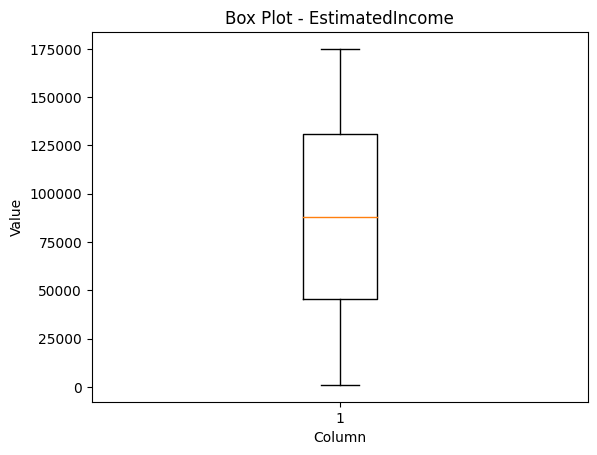

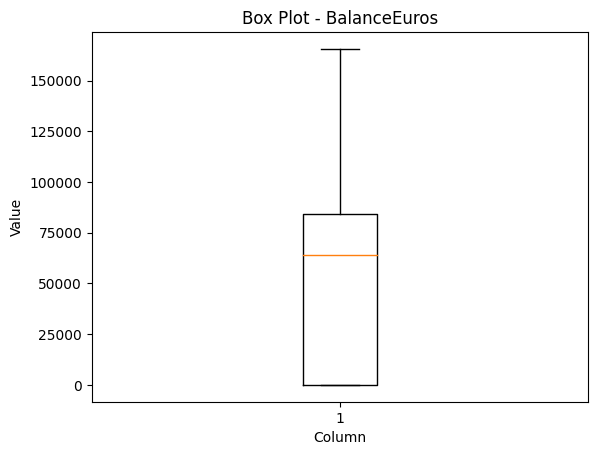

In [9]:
# Create box plots for specific columns
columns = ['EstimatedIncome', 'BalanceEuros']

# Create separate box plots for each column
for column in columns:
    plt.figure()  # Create a new figure for each column
    plt.boxplot(df[column])
    plt.title(f"Box Plot - {column}")
    plt.xlabel("Column")
    plt.ylabel("Value")

    # Display the plot
    plt.show()

<ipython-input-10-382a41f141d7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


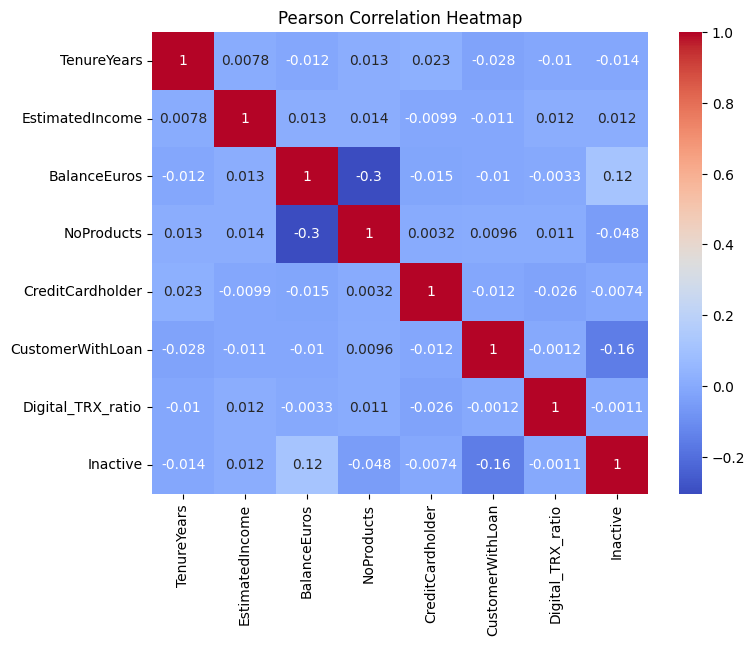

In [10]:
# Calculate Pearson correlation between features
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as desired
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add plot title
plt.title('Pearson Correlation Heatmap')

# Display the plot
plt.show()

As shown is this heatmap, there is no significant correlation between the features

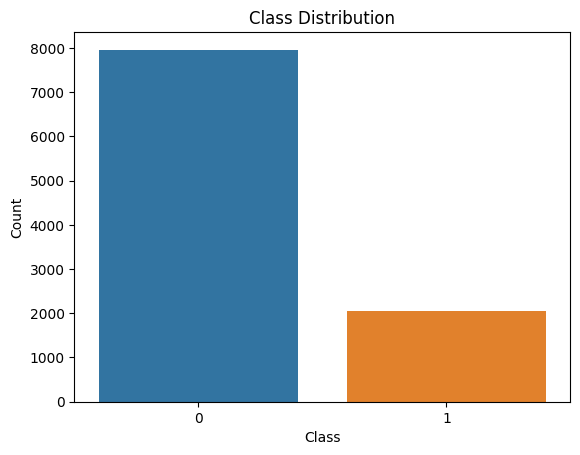

In [11]:
# Perform one-hot encoding
df = pd.get_dummies(df)
# Specify the columns to normalize
columns_to_normalize = ['EstimatedIncome', 'BalanceEuros']

# Normalisation
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler on the selected columns
scaler.fit(df[columns_to_normalize])

# Transform and replace the selected columns with normalised values
df[columns_to_normalize] = scaler.transform(df[columns_to_normalize])


# Get Class imbalance
# Plot the class distribution
sns.countplot(x='Inactive', data=df)

# Add plot labels
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Display the plot
plt.show()

In [12]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Inactive', axis=1), df['Inactive'], test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 18)
X_test shape: (2000, 18)
y_train shape: (8000,)
y_test shape: (2000,)


## Model Training



### Baseline models

In [13]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [14]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

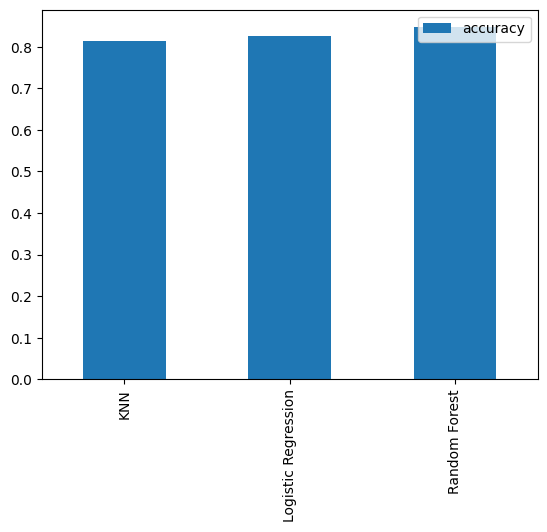

In [15]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

### Hyperparameter tuning

#### KNN

In [16]:
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 82.50%


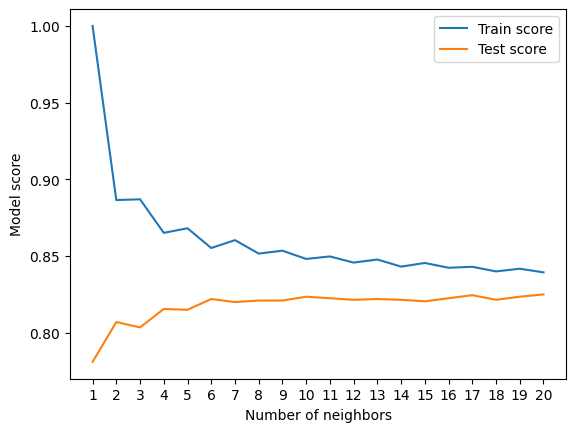

In [17]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

#### Logistic Regression

In [18]:
# Set Logistic Regression hyperparameters
log_reg_grid = {"C": np.logspace(-2, 2, 25),
                "solver": ["liblinear"]}

# Setup random hyperparameter search for LogisticRegression
log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [19]:
log_reg.best_params_

{'solver': 'liblinear', 'C': 0.1467799267622069}

In [20]:
log_reg.score(X_test, y_test)

0.827

#### Random Forest

In [21]:
# Set Random Forest Classifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 200, 20),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
# Setup grid hyperparameter search for LogisticRegression
rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit grid hyperparameter search model
rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [22]:
rf.best_params_

{'n_estimators': 190,
 'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [23]:
rf.score(X_test, y_test)

0.8505

Since Random Forest Classifier has the best results out of the 3 models. We continue the hyperparameter tuning with `GridSearch` in order to find the best possible model. </br>
**GridSearch** is not preferred first as is an exhaustive method at needs a significant amount of time to run.

In [24]:
# Different Random Forest Classifier hyperparameters
rf_grid = {"n_estimators": np.arange(50, 100, 10),
           "max_depth": [None, 3, 5],
           "min_samples_split": np.arange(5, 10, 1),
           "min_samples_leaf": np.arange(1, 10, 2)}
# Setup grid hyperparameter search for LogisticRegression
rf = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
rf.fit(X_train, y_train);

Fitting 5 folds for each of 375 candidates, totalling 1875 fits


In [25]:
rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'n_estimators': 60}

In [26]:
rf.score(X_test, y_test)

0.845

### Model Evaluation

In [27]:
# Make preidctions on test data
y_preds = rf.predict(X_test)

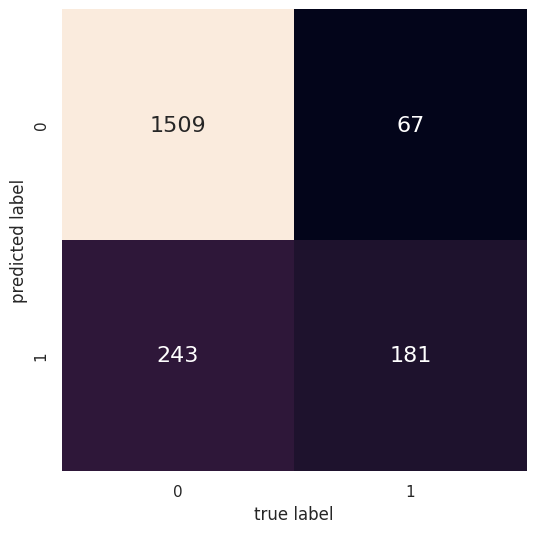

In [28]:
sns.set(font_scale=1)

def plot_conf_mat(y_test, y_preds):
    np.set_printoptions(suppress=True)
    fig, ax = plt.subplots(figsize=(6, 6))
    ax =  sns.heatmap(confusion_matrix(y_test, y_preds),
                annot=True,
                fmt='d',
                cbar=False,
                annot_kws={"size": 16})
    plt.xlabel("true label")
    plt.ylabel("predicted label")

plot_conf_mat(y_test, y_preds)

In [29]:
# Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1576
           1       0.73      0.43      0.54       424

    accuracy                           0.84      2000
   macro avg       0.80      0.69      0.72      2000
weighted avg       0.83      0.84      0.83      2000



Fitting 5 folds for each of 375 candidates, totalling 1875 fits
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1576
           1       0.59      0.60      0.60       424

    accuracy                           0.83      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.83      0.83      0.83      2000



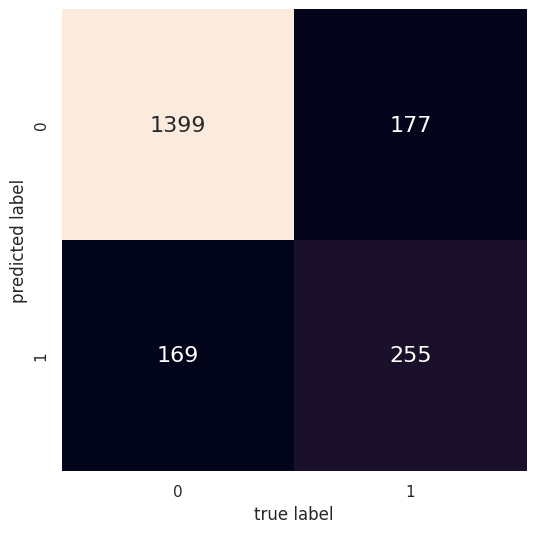

In [30]:
smote = SMOTE(sampling_strategy={1: 5000})

# Apply SMOTE only on the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train your model on the resampled training data
rf.fit(X_train_resampled, y_train_resampled)

# Make preidctions on test data
y_preds_new = rf.predict(X_test)

plot_conf_mat(y_test, y_preds_new)

# Show classification report
print(classification_report(y_test, y_preds_new))

Minimizing the class imbalance not only **does not** help the model BUT confuses it more.

## Results

In [31]:
# Check best hyperparameters
rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 70}

In [32]:
rf = RandomForestClassifier(max_depth = None,
                            min_samples_leaf=  7,
                            min_samples_split= 9,
                            n_estimators= 50)

In [33]:
# Cross-validated accuracy score
cv_acc = cross_val_score(rf,
                         X_test,
                         y_test,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc = np.mean(cv_acc)

# Cross-validated precision score
cv_precision = np.mean(cross_val_score(rf,
                                       X_test,
                                       y_test,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring

# Cross-validated recall score
cv_recall = np.mean(cross_val_score(rf,
                                    X_test,
                                    y_test,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring

# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(rf,
                                X_test,
                                y_test,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring

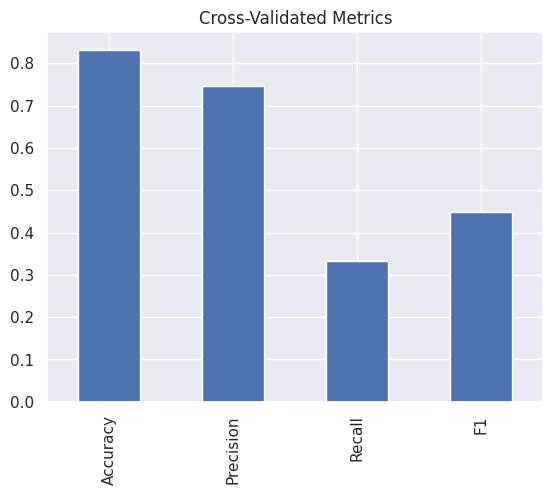

In [34]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

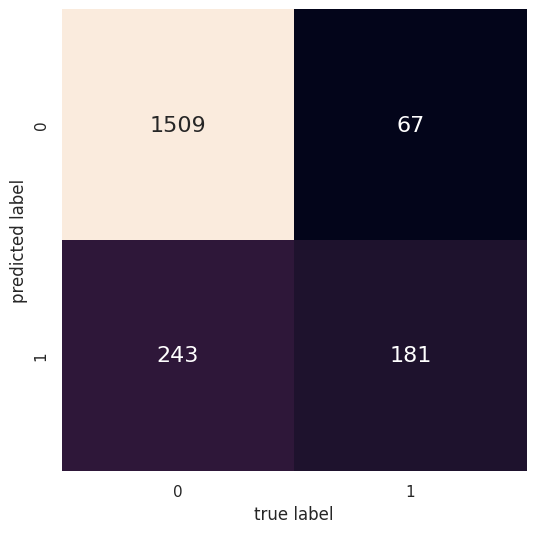

In [35]:
plot_conf_mat(y_test, y_preds)

## Business Insights

This solution can be helpful as it can predict with more than **83% accuracy** if a client will become inactive in the following 3 months. However, the **17%** error in production is worth worrying. That is because, the model is over 5 times more likely to falsely predict a client's inactivity while the **client actually remains active**. This implies that there is a mere **2.25%** probability of a client turns inactive without our awareness. </br>

In business terms:
With 83 out of 100 clients accurately predicted in their actions, our predictive solution arms us with unprecedented foresight. The remaining 17 clients, initially perceived as potentially inactive, are revealed to remain active. Our relentless pursuit of perfection aims to reduce this number, ensuring we offer the most reliable predictions possible.

In conclusion, our high-precision predictive solution equips us with invaluable insights into client behavior, enabling data-driven decisions that will drive growth and optimize customer engagement. As we continue to refine our model and algorithms, we pledge to keep you informed of our progress and look forward to maximizing the impact of this transformative technology on our business.

## Recommendations
- More data could help the model evolve and predict more accurately.
- Class imbalance has affected the results, but artificially creating new hasn't helped the model bring better results.


